In [1]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

C:\Users\moinu\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
New_Features_Wav = pd.read_csv("New_Wav_Features_Data.csv")
New_Features_Wav

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,CATEGORY
0,0.098566,0.871522,0.540084,0.521832,0.684049,0.659406,0.500841,0.595396,0.670797,0.464831,...,8.038217e-05,2.896732e-05,2.622696e-06,-0.016298,-0.006546,0.037400,0.074779,0.002713,-0.008135,street_music
1,0.098477,0.871815,0.540328,0.522246,0.683896,0.659482,0.501421,0.595245,0.670575,0.464525,...,8.301233e-05,3.107791e-05,4.459749e-06,-0.016267,-0.006518,0.037398,0.074814,0.002671,-0.008126,street_music
2,0.100848,0.875557,0.496965,0.487443,0.639452,0.591784,0.440499,0.560187,0.611627,0.413103,...,1.187899e-05,4.595527e-06,1.409642e-06,0.015690,-0.004376,-0.052409,0.079064,-0.006828,0.023206,street_music
3,0.099421,0.870151,0.536888,0.524355,0.694037,0.666182,0.501681,0.591686,0.675235,0.466929,...,8.087776e-05,2.990849e-05,3.000079e-06,-0.010340,-0.023957,0.048607,0.060006,-0.001945,-0.008028,street_music
4,0.047108,0.712387,0.710270,0.798388,0.876454,0.772832,0.725270,0.747244,0.797047,0.842663,...,1.183513e-05,4.426488e-06,1.372738e-06,0.011215,-0.036892,-0.034000,0.014488,0.000453,-0.004769,street_music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34923,0.060907,0.742962,0.635503,0.464348,0.225448,0.144491,0.190055,0.220756,0.219721,0.157516,...,7.589417e-08,7.458348e-08,7.377914e-08,0.000326,-0.005781,0.071989,-0.016542,-0.012038,-0.020598,dog_bark
34924,0.276756,0.900935,0.864405,0.689064,0.638855,0.599290,0.552229,0.551954,0.569964,0.618976,...,3.407240e-01,9.892733e-02,1.123263e-02,0.009697,-0.004258,-0.002856,0.027116,-0.008766,0.005801,drilling
34925,0.282637,0.889526,0.739484,0.646851,0.626788,0.562957,0.556916,0.562501,0.606304,0.682846,...,3.432130e-01,9.988208e-02,1.306900e-02,0.008525,-0.003353,-0.003035,0.027161,-0.008055,0.005636,drilling
34926,0.294750,0.899398,0.876640,0.704092,0.640825,0.550205,0.542563,0.553553,0.609321,0.649074,...,6.206696e-02,2.629774e-02,1.018906e-03,0.006065,0.008038,-0.013470,0.041575,0.002261,0.015867,drilling


In [3]:
print(New_Features_Wav["CATEGORY"].value_counts())

air_conditioner     4000
dog_bark            4000
drilling            4000
street_music        4000
children_playing    4000
engine_idling       4000
jackhammer          4000
siren               3716
car_horn            1716
gun_shot            1496
Name: CATEGORY, dtype: int64


In [4]:
from sklearn import preprocessing

OHE_Function = OneHotEncoder()
Scaler_Function = StandardScaler()

In [5]:
Part_X = New_Features_Wav.iloc[:,:-1].values
Part_Y = New_Features_Wav["CATEGORY"].values

In [6]:
print(Part_X.shape)
print(Part_Y.shape)

(34928, 168)
(34928,)


In [7]:
Part_Y_Encode = OHE_Function.fit_transform(np.array(Part_Y).reshape(-1,1)).toarray()
print(Part_Y_Encode.shape)

(34928, 10)


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(Part_X, Part_Y_Encode, train_size=0.9, random_state = 42, shuffle=True)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(31435, 168)
(31435, 10)
(3493, 168)
(3493, 10)


In [9]:
# n_features = 1
n_seq = 21
n_steps = 8
X_train = X_train.reshape(X_train.shape[0], n_seq, n_steps)
X_test = X_test.reshape(X_test.shape[0], n_seq, n_steps)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(31435, 21, 8)
(3493, 21, 8)
(31435, 10)


In [10]:
Call_Back_Early_Stop = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Call_Back_Check_Hybrid = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_LSTM_model")

In [11]:
output_labels = 10
compile_metrics = ["accuracy"]
compile_loss = "categorical_crossentropy"
compile_optimizer = "adam"

In [12]:
# from numpy import array
# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.layers import TimeDistributed
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D

# Model_Hybrid = Sequential()
# #
# Model_Hybrid.add(Conv2D(64,(3, 3),padding="same",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])))
# Model_Hybrid.add(MaxPool2D(pool_size=(2, 2)))
# #
# Model_Hybrid.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
# Model_Hybrid.add(Dropout(0.3))
# Model_Hybrid.add(MaxPool2D(pool_size=(2, 2)))
# #
# Model_Hybrid.add(Conv2D(256, (3, 3), padding = "same", activation = "relu"))
# Model_Hybrid.add(Dropout(0.3))
# Model_Hybrid.add(MaxPool2D(pool_size=(2, 2)))
# #
# Model_Hybrid.add(Flatten())
# Model_Hybrid.add(Dense(1024, activation = "relu"))
# Model_Hybrid.add(Dropout(0.5))
# Model_Hybrid.add(Dense(output_labels, activation = "softmax"))

# Model_Hybrid.add(LSTM(128, activation='relu'))
# Model_Hybrid.add(Dense(output_labels, activation = "softmax"))


In [13]:
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam

#Adding the input LSTM network layer
model_LSTM = Sequential()
model_LSTM.add(LSTM(128, input_shape=(21,8), return_sequences=True))
model_LSTM.add(Dropout(0.2))
# model_LSTM.add(Dense(10, activation='softmax'))

#Adding a second LSTM network layer
model_LSTM.add(LSTM(128))

#Adding a dense hidden layer
model_LSTM.add(Dense(64, activation='relu'))
model_LSTM.add(Dropout(0.2))

#Adding the output layer
model_LSTM.add(Dense(output_labels, activation='softmax'))

In [14]:
model_LSTM.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [15]:
LSTM_Model = model_LSTM.fit(X_train, Y_train, epochs=200, batch_size=31435,
                                validation_data=(X_test, Y_test), callbacks=[Call_Back_Early_Stop,Call_Back_Check_Hybrid])

Epoch 1/200
1/1 [==============================] - ETA: 0s - loss: 2.3023 - accuracy: 0.1120WARNING:tensorflow:From C:\Users\moinu\anaconda3\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: .\my_LSTM_model\assets
1/1 [==============================] - 14s 14s/step - loss: 2.3023 - accuracy: 0.1120 - val_loss: 2.2858 - val_accuracy: 0.1509
Epoch 2/200
1/1 [==============================] - 13s 13s/step - loss: 2.2861 - accuracy: 0.1515 - val_loss: 2.2697 - val_accuracy: 0.1721
Epoch 3/200
1/1 [==============================] - 13s 13s/step - loss: 2.2722 - accuracy: 0.1655 - val_lo

1/1 [==============================] - 13s 13s/step - loss: 1.4649 - accuracy: 0.5065 - val_loss: 1.3842 - val_accuracy: 0.5322
Epoch 30/200
1/1 [==============================] - 13s 13s/step - loss: 1.4434 - accuracy: 0.5123 - val_loss: 1.3528 - val_accuracy: 0.5502
Epoch 31/200
1/1 [==============================] - 13s 13s/step - loss: 1.4094 - accuracy: 0.5245 - val_loss: 1.3294 - val_accuracy: 0.5557
Epoch 32/200
1/1 [==============================] - 13s 13s/step - loss: 1.3888 - accuracy: 0.5356 - val_loss: 1.2950 - val_accuracy: 0.5663
Epoch 33/200
1/1 [==============================] - 14s 14s/step - loss: 1.3580 - accuracy: 0.5479 - val_loss: 1.2746 - val_accuracy: 0.5686
Epoch 34/200
1/1 [==============================] - 13s 13s/step - loss: 1.3348 - accuracy: 0.5548 - val_loss: 1.2416 - val_accuracy: 0.5849
Epoch 35/200
1/1 [==============================] - 14s 14s/step - loss: 1.3076 - accuracy: 0.5636 - val_loss: 1.2154 - val_accuracy: 0.6018
Epoch 36/200
1/1 [========

1/1 [==============================] - 13s 13s/step - loss: 0.8820 - accuracy: 0.7103 - val_loss: 0.8321 - val_accuracy: 0.7275
Epoch 60/200
1/1 [==============================] - 14s 14s/step - loss: 0.8640 - accuracy: 0.7166 - val_loss: 0.8077 - val_accuracy: 0.7295
Epoch 61/200
1/1 [==============================] - 0s 375ms/step - loss: 0.8463 - accuracy: 0.7191 - val_loss: 0.8189 - val_accuracy: 0.7289
Epoch 62/200
1/1 [==============================] - 13s 13s/step - loss: 0.8444 - accuracy: 0.7217 - val_loss: 0.7986 - val_accuracy: 0.7360
Epoch 63/200
1/1 [==============================] - 13s 13s/step - loss: 0.8347 - accuracy: 0.7253 - val_loss: 0.7909 - val_accuracy: 0.7378
Epoch 64/200
1/1 [==============================] - 14s 14s/step - loss: 0.8199 - accuracy: 0.7328 - val_loss: 0.7773 - val_accuracy: 0.7403
Epoch 65/200
1/1 [==============================] - 13s 13s/step - loss: 0.8081 - accuracy: 0.7329 - val_loss: 0.7666 - val_accuracy: 0.7418
Epoch 66/200
1/1 [=======

Epoch 94/200
1/1 [==============================] - 0s 416ms/step - loss: 0.5655 - accuracy: 0.8132 - val_loss: 0.5854 - val_accuracy: 0.8050
Epoch 95/200
1/1 [==============================] - 15s 15s/step - loss: 0.5630 - accuracy: 0.8158 - val_loss: 0.5748 - val_accuracy: 0.8102
Epoch 96/200
1/1 [==============================] - 0s 419ms/step - loss: 0.5589 - accuracy: 0.8168 - val_loss: 0.5823 - val_accuracy: 0.8073
Epoch 97/200
1/1 [==============================] - 0s 417ms/step - loss: 0.5550 - accuracy: 0.8180 - val_loss: 0.5761 - val_accuracy: 0.8088
Epoch 98/200
1/1 [==============================] - 0s 429ms/step - loss: 0.5574 - accuracy: 0.8160 - val_loss: 0.5826 - val_accuracy: 0.8062
Epoch 99/200
1/1 [==============================] - 15s 15s/step - loss: 0.5589 - accuracy: 0.8149 - val_loss: 0.5637 - val_accuracy: 0.8128
Epoch 100/200
1/1 [==============================] - 14s 14s/step - loss: 0.5411 - accuracy: 0.8233 - val_loss: 0.5496 - val_accuracy: 0.8162
Epoch 10

1/1 [==============================] - 0s 379ms/step - loss: 0.3851 - accuracy: 0.8736 - val_loss: 0.4461 - val_accuracy: 0.8514
Epoch 133/200
1/1 [==============================] - 13s 13s/step - loss: 0.3799 - accuracy: 0.8732 - val_loss: 0.4377 - val_accuracy: 0.8591
Epoch 134/200
1/1 [==============================] - 0s 381ms/step - loss: 0.3766 - accuracy: 0.8759 - val_loss: 0.4439 - val_accuracy: 0.8574
Epoch 135/200
1/1 [==============================] - 0s 382ms/step - loss: 0.3792 - accuracy: 0.8757 - val_loss: 0.4359 - val_accuracy: 0.8580
Epoch 136/200
1/1 [==============================] - 13s 13s/step - loss: 0.3732 - accuracy: 0.8771 - val_loss: 0.4324 - val_accuracy: 0.8603
Epoch 137/200
1/1 [==============================] - 14s 14s/step - loss: 0.3675 - accuracy: 0.8795 - val_loss: 0.4345 - val_accuracy: 0.8637
Epoch 138/200
1/1 [==============================] - 0s 381ms/step - loss: 0.3662 - accuracy: 0.8797 - val_loss: 0.4250 - val_accuracy: 0.8626
Epoch 139/200
1/

In [16]:
print(model_LSTM.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 21, 128)           70144     
_________________________________________________________________
dropout (Dropout)            (None, 21, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 210,634
Trainable params: 210,634
Non-trainable params: 0
__________________________________________________

In [17]:
Model_Results_LSTM = model_LSTM.evaluate(X_test,Y_test)
print("LOSS:  " + "%.4f" % Model_Results_LSTM[0])
print("ACCURACY:  " + "%.4f" % Model_Results_LSTM[1])

110/110 [==============================] - 1s 8ms/step - loss: 0.3911 - accuracy: 0.8775
LOSS:  0.3911
ACCURACY:  0.8775


In [63]:
# import numpy
# print(numpy.__version__)

1.19.5


<AxesSubplot:title={'center':'LSTM'}>

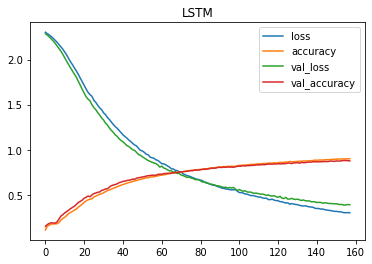

In [19]:
Grap_Data_LSTM = pd.DataFrame(LSTM_Model.history)
Grap_Data_LSTM.plot(title='LSTM')

No handles with labels found to put in legend.


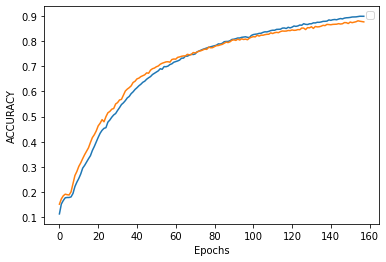

In [20]:
plt.plot(LSTM_Model.history["accuracy"])
plt.plot(LSTM_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.xlabel("Epochs")
plt.legend()
plt.show()

No handles with labels found to put in legend.


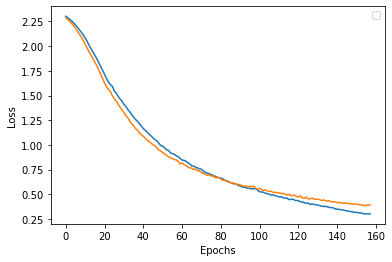

In [21]:
plt.plot(LSTM_Model.history["loss"])
plt.plot(LSTM_Model.history["val_loss"])
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [22]:
prediction_test_LSTM = model_LSTM.predict(X_test)
prediction_test_LSTM_Arg = np.argmax(prediction_test_LSTM,axis=1)

In [23]:
# prediction checking

print(prediction_test_LSTM_Arg)
y_prediction_LSTM = OHE_Function.inverse_transform(prediction_test_LSTM)

[5 4 0 ... 2 8 3]


In [24]:
Y_test = OHE_Function.inverse_transform(Y_test)

In [25]:
print(prediction_test_LSTM[0:5])
print("---"*20)
print(y_prediction_LSTM[0:5])
print("---"*20)
print(Y_test[0:5])

[[1.28814481e-05 2.96409671e-05 2.57447973e-04 2.29455381e-05
  9.14983411e-06 9.99352992e-01 1.09549433e-06 8.81858887e-06
  6.17486012e-06 2.98907864e-04]
 [8.03254734e-05 5.08962781e-04 3.78761403e-02 1.46963075e-02
  9.29838955e-01 2.30485879e-04 9.89044923e-03 5.37157850e-03
  3.81370250e-04 1.12551346e-03]
 [9.99061048e-01 1.37015252e-06 5.77060746e-05 6.32755473e-05
  1.65570509e-05 8.24614472e-06 2.85550584e-07 1.37484840e-05
  7.94045991e-05 6.98363758e-04]
 [9.98291790e-01 3.00288866e-05 2.92367360e-04 1.64114928e-04
  6.44165775e-05 2.75746133e-05 1.09901021e-06 4.15352551e-05
  2.13599225e-04 8.73448851e-04]
 [6.67648237e-06 9.98503327e-01 3.25180881e-05 1.81711785e-05
  1.09354158e-04 3.62123433e-06 5.37927963e-06 3.60964768e-04
  5.97957151e-05 9.00239800e-04]]
------------------------------------------------------------
[['engine_idling']
 ['drilling']
 ['air_conditioner']
 ['air_conditioner']
 ['car_horn']]
------------------------------------------------------------
[[

In [26]:
conf_matrix = confusion_matrix(Y_test, y_prediction_LSTM)
acc_score = accuracy_score(Y_test, y_prediction_LSTM)
class_report = classification_report(Y_test, y_prediction_LSTM)

In [27]:
print(acc_score)
print("---"*20)
print(class_report)

0.877469224162611
------------------------------------------------------------
                  precision    recall  f1-score   support

 air_conditioner       0.89      0.95      0.92       375
        car_horn       0.82      0.86      0.84       145
children_playing       0.72      0.76      0.74       395
        dog_bark       0.89      0.82      0.86       432
        drilling       0.92      0.92      0.92       403
   engine_idling       0.97      0.94      0.96       419
        gun_shot       0.94      0.93      0.93       149
      jackhammer       0.93      0.96      0.94       419
           siren       0.95      0.91      0.93       369
    street_music       0.75      0.74      0.74       387

        accuracy                           0.88      3493
       macro avg       0.88      0.88      0.88      3493
    weighted avg       0.88      0.88      0.88      3493

